## Create the dataset

In [1]:
import torchvision.datasets as datasets
import torchvision.transforms as ttf
valdir = "mydatasetdir"
imagenet =datasets.ImageFolder(valdir, #Root dir -> ImageFolder expects images divided in folders by label
            ttf.Compose([ #Preprocessing
            ttf.Scale(256), #Resize to 256x256
            ttf.CenterCrop(224), #Use central crop of 224x224
            ttf.ToTensor(), #Transform between 0 and 1
            ttf.Normalize(mean=[0.485, 0.456, 0.406], #Normalization with mean and std
            std=[0.229, 0.224, 0.225]),
        ]))

/home/maria/.local/lib/python3.5/site-packages/torchvision/transforms/transforms.py:156: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


## Create the dataloader

In [2]:
from torch.utils.data import DataLoader
batch_size = 8 
dataloader = DataLoader(
        imagenet,
        batch_size = batch_size, shuffle = False)

## Load the pre-trained model

In [3]:
import torchvision.models as models
model = models.resnet101(pretrained = True)

In [4]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

## We are ready to test the model!

In [5]:
import numpy as np
from tqdm import tqdm_notebook as tqdm #For progress visualization
import torch.nn as nn #Main module library

use_cuda = True # We are using GPU optimization
predictions = np.zeros((len(imagenet),1000)) #Saving our predictions in a matrix
gt_labels = np.zeros((len(imagenet),)) #Gathering the GT for evaluation
softmax = nn.Softmax() #We use a softmax layer to normalize the preductions (optional)
if use_cuda: #If we use GPU optimization, we need to do .cuda() to our model and data
    model = model.cuda()
    softmax = softmax.cuda()
model.eval() #Setting the model to test mode
for i, batch in tqdm(enumerate(dataloader)): # We iterate over the dataset in batches
    if use_cuda:
        batch_preds = model.forward(batch[0].cuda()) #Forward the input and obtain the output
    else:
        batch_preds = model.forward(batch[0])
    batch_preds = softmax.forward(batch_preds) #Softmax
    predictions[i*batch_size:i*batch_size+batch_size,:]=batch_preds.cpu().detach().numpy() #Save the predictions
    gt_labels[i*batch_size:i*batch_size+batch_size]=batch[1].cpu().detach().numpy() #Save the GT
np.save(valdir+"resnet101.npy", predictions) #Save all

/home/maria/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Evaluation
We have our predictions, we are going to calculate the top-1 and top-5 accuracy and errors.

In [6]:
top_preds=np.argsort(predictions,axis=1)[:,::-1]
top1_accuracy=np.sum(gt_labels == np.argmax(predictions,axis=1))/len(gt_labels)
top5_accuracy=np.sum([gt_labels[i] in top_preds[i,:5] for i in range(len(gt_labels))])/len(gt_labels)
print("Top1 accuracy:",top1_accuracy, ", Classification error:", 1-top1_accuracy)
print("Top5 accuracy:",top5_accuracy, ", Classification error:", 1-top5_accuracy)

Top1 accuracy: 0.7738 , Classification error: 0.22619999999999996
Top5 accuracy: 0.93548 , Classification error: 0.06452000000000002


In [23]:
import json
classes_names=[]
with open("/mnt/NAS/Trimbot/Data/ImageNET/imagenet1000_clsid_to_human.txt") as f:
    for line in f:
        if line.endswith("}"):
            line=line[:-1]
        classes_names.append(line.split(":")[-1][2:-3])
classes_names

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

0: laptop, laptop computer
1: notebook, notebook computer
2: computer keyboard, keypad
3: mouse, computer mouse
4: desk
0: anemone fish
1: sea anemone, anemone
2: coral reef
3: sunscreen, sunblock, sun blocker
4: beer bottle
0: beer bottle
1: beer glass
2: pop bottle, soda bottle
3: cocktail shaker
4: water bottle


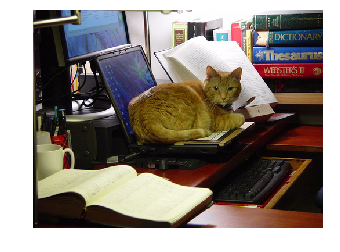

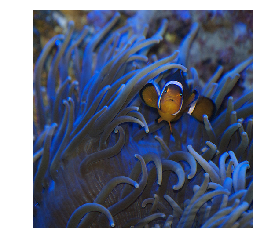

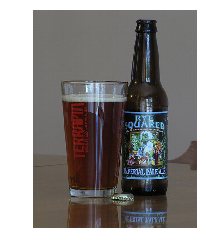

In [48]:
import matplotlib.pyplot as plt
classtoshow=[281,393,441]
ims=[plt.imread("/mnt/NAS/Trimbot/Data/ImageNET/val/281/ILSVRC2012_val_00001341.jpeg"),
     plt.imread("/mnt/NAS/Trimbot/Data/ImageNET/val/393/ILSVRC2012_val_00001176.jpeg"),
     plt.imread("/mnt/NAS/Trimbot/Data/ImageNET/val/441/ILSVRC2012_val_00003994.jpeg")]
preds_ims=np.argsort(preds,1)[:,::-1][idxs,:5]
for pred,im in zip(preds_ims[0],ims):
    plt.figure()
    plt.imshow(im)
    plt.axis("off")
    for i,l in enumerate(pred):
        print(str(i)+": "+str(classes_names[int(l)]))


In [30]:
idxs=[[281*50,393*50,441*50+1]]

In [36]:
np.argsort(preds,1)[:,::-1][idxs,:5]

array([[[620, 681, 508, 673, 526],
        [393, 108, 973, 838, 440],
        [440, 441, 737, 503, 898]]])

NameError: name 'DogsVdCatsDataSet' is not defined